In [1]:
"""
Time Domain: Imagine you're recording the volume of your favorite song every second. Your data (time series) is a list of volumes at each time point. This is the time domain—it shows how the signal changes over time.

Frequency Domain: Now, instead of seeing "volume vs. time," you want to know which musical notes (frequencies) make up the song. The frequency domain breaks the signal into its ingredient frequencies (like separating a smoothie back into fruits). This reveals hidden patterns (e.g., a 440 Hz "A" note dominating).


"""

'\nTime Domain: Imagine you\'re recording the volume of your favorite song every second. Your data (time series) is a list of volumes at each time point. This is the time domain—it shows how the signal changes over time.\n\nFrequency Domain: Now, instead of seeing "volume vs. time," you want to know which musical notes (frequencies) make up the song. The frequency domain breaks the signal into its ingredient frequencies (like separating a smoothie back into fruits). This reveals hidden patterns (e.g., a 440 Hz "A" note dominating).\n\n\n'

In [3]:
"""
Why Transform?

Find hidden cycles (e.g., heartbeats in medical data).

Remove noise (delete unwanted frequencies).

Compress data (keep only important frequencies).

Key Tool: The Fast Fourier Transform (FFT) is an algorithm that converts time-domain data to frequency-domain.
"""

'\nWhy Transform?\n\nFind hidden cycles (e.g., heartbeats in medical data).\n\nRemove noise (delete unwanted frequencies).\n\nCompress data (keep only important frequencies).\n\nKey Tool: The Fast Fourier Transform (FFT) is an algorithm that converts time-domain data to frequency-domain.\n'

In [4]:
"""
We'll create a signal with 5 Hz and 20 Hz waves, add noise, and use FFT to find these frequencies.

"""

"\nWe'll create a signal with 5 Hz and 20 Hz waves, add noise, and use FFT to find these frequencies.\n\n"

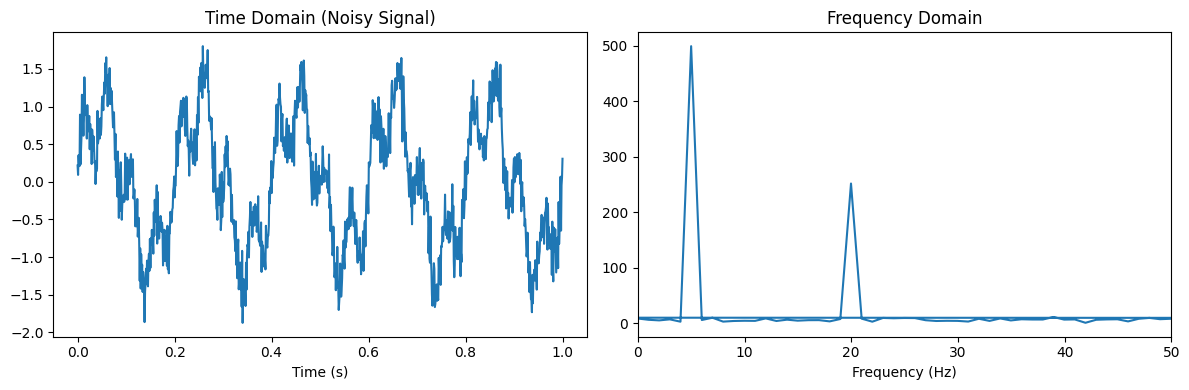

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a time series (time domain)
t = np.linspace(0, 1, 1000)  # 1 second, 1000 points
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)  # 5Hz + 20Hz
noise = 0.2 * np.random.randn(1000)  # Random noise
noisy_signal = signal + noise

# 2. Plot time domain
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t, noisy_signal)
plt.title("Time Domain (Noisy Signal)")
plt.xlabel("Time (s)")

# 3. Transform to frequency domain
fft_result = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(t), t[1] - t[0])  # Frequencies in Hz
magnitude = np.abs(fft_result)  # Strength of each frequency

# 4. Plot frequency domain
plt.subplot(122)
plt.plot(freqs, magnitude)
plt.xlim(0, 50)  # Show 0-50 Hz range
plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

In [ ]:
"""
Output:

Left: Wiggly time-domain signal (hard to see patterns).

Right: Peaks at 5 Hz and 20 Hz (even with noise!).
"""

In [6]:
"""
Assignment 1: Remove Noise from an Audio Signal
Goal: Clean a noisy signal by deleting high-frequency noise.
Steps:

Download a short audio clip (e.g., sample here) or use scipy.io.wavfile.read.

Add artificial noise (e.g., noise = 0.3 * np.random.randn(len(audio))).

Use FFT to transform to frequency domain.

Set high-frequency components (>1000 Hz) to zero.

Convert back to time domain using np.fft.ifft.

Play the cleaned audio. Compare before/after!

Key Insight: Noise often lives in high frequencies; removing them cleans the signal.
"""

'\nAssignment 1: Remove Noise from an Audio Signal\nGoal: Clean a noisy signal by deleting high-frequency noise.\nSteps:\n\nDownload a short audio clip (e.g., sample here) or use scipy.io.wavfile.read.\n\nAdd artificial noise (e.g., noise = 0.3 * np.random.randn(len(audio))).\n\nUse FFT to transform to frequency domain.\n\nSet high-frequency components (>1000 Hz) to zero.\n\nConvert back to time domain using np.fft.ifft.\n\nPlay the cleaned audio. Compare before/after!\n\nKey Insight: Noise often lives in high frequencies; removing them cleans the signal.\n'

In [ ]:
"""
Assignment 2: Detect Heart Rate from PPG Data
Goal: Find the heart rate (beats/minute) from a pulse sensor signal.
Data: Use synthetic PPG data:
"""

In [7]:
t = np.linspace(0, 10, 1000)  # 10 seconds
heart_rate = 60  # 60 beats/minute = 1 Hz
ppg = np.sin(2 * np.pi * heart_rate/60 * t) + 0.1 * np.random.randn(1000)

In [8]:
"""
Steps:

Compute FFT of the PPG signal.

Find the frequency with the highest magnitude (ignore near 0 Hz).

Convert this frequency to beats/minute (e.g., 1 Hz → 60 bpm).

Challenge: Add motion noise (e.g., 2 Hz wobble) and still detect the heart rate.

Key Insight: Heart rate appears as a peak in the frequency spectrum.
"""

'\nSteps:\n\nCompute FFT of the PPG signal.\n\nFind the frequency with the highest magnitude (ignore near 0 Hz).\n\nConvert this frequency to beats/minute (e.g., 1 Hz → 60 bpm).\n\nChallenge: Add motion noise (e.g., 2 Hz wobble) and still detect the heart rate.\n\nKey Insight: Heart rate appears as a peak in the frequency spectrum.\n'

In [9]:
"""
Assignment 3: Analyze Daily Temperature Cycles
Goal: Find yearly/daily cycles in city temperature data.
Data: Use New York City temperatures (2023) or generate:
"""

'\nAssignment 3: Analyze Daily Temperature Cycles\nGoal: Find yearly/daily cycles in city temperature data.\nData: Use New York City temperatures (2023) or generate:\n'

In [10]:
days = np.arange(365)  # 365 days
temperature = 10 * np.sin(2 * np.pi * days/365) + 5 * np.sin(2 * np.pi * days/7) + 20

In [11]:
"""
Steps:

Plot temperature vs. days (time domain).

Compute FFT to get frequency spectrum.

Identify peaks:

Yearly cycle (frequency = 1/365 days⁻¹ → 1 peak/year).

Weekly cycle (frequency = 1/7 days⁻¹).

Challenge: Which cycle has a bigger impact on temperature?

Key Insight: Real-world cycles (yearly/weekly) appear as distinct FFT peaks.
"""

'\nSteps:\n\nPlot temperature vs. days (time domain).\n\nCompute FFT to get frequency spectrum.\n\nIdentify peaks:\n\nYearly cycle (frequency = 1/365 days⁻¹ → 1 peak/year).\n\nWeekly cycle (frequency = 1/7 days⁻¹).\n\nChallenge: Which cycle has a bigger impact on temperature?\n\nKey Insight: Real-world cycles (yearly/weekly) appear as distinct FFT peaks.\n'

In [2]:
"""
Why This Matters:
FFT is used everywhere:

Spotify shuffle (audio analysis),

MRI machines (medical imaging),

5G networks (signal processing).

Start with these assignments—you’ll unlock superpowers to see hidden patterns in data! 
"""

'\nWhy This Matters:\nFFT is used everywhere:\n\nSpotify shuffle (audio analysis),\n\nMRI machines (medical imaging),\n\n5G networks (signal processing).\n\nStart with these assignments—you’ll unlock superpowers to see hidden patterns in data! \n'